# Baca Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('used_car_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 376.2+ KB


# No 1

In [2]:
#1.Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut? 
merkMobil = df['Name'].str.upper().str.split(' ')
#print(merkMobil)
df['Brand'] = merkMobil.apply(lambda x: x[0])
#df[df['Brand']=='LAND'] = 'LAND ROVER'
df['Brand'].value_counts()

MARUTI           1211
HYUNDAI          1107
HONDA             608
TOYOTA            411
MERCEDES-BENZ     318
VOLKSWAGEN        315
FORD              300
MAHINDRA          272
BMW               267
AUDI              236
TATA              186
SKODA             173
RENAULT           145
CHEVROLET         121
NISSAN             91
LAND               60
JAGUAR             40
FIAT               28
MITSUBISHI         27
MINI               26
VOLVO              21
PORSCHE            18
JEEP               15
DATSUN             13
FORCE               3
ISUZU               3
AMBASSADOR          1
LAMBORGHINI         1
BENTLEY             1
SMART               1
Name: Brand, dtype: int64

In [ ]:
df['Brand'].value_counts().plot.bar()
plt.savefig('grafik1.png')

# No 2

In [11]:
#2. Kota apa yang memiliki mobil bekas paling banyak? 
df['Location'].value_counts()


Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

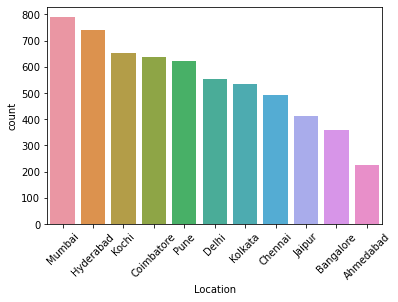

In [10]:
sns.countplot(x='Location',data=df)
plt.xticks(rotation=45)

# No 3

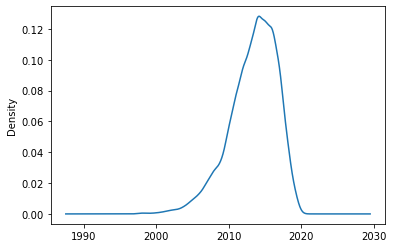

In [12]:
#3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut? 
df['Year'].plot.kde()

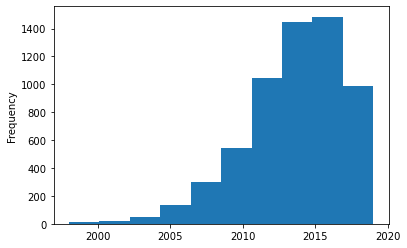

In [39]:
df['Year'].plot.hist()

# No 4

In [ ]:
#4.Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?
df[df['Kilometers_Driven']<100000].shape

# No 5

In [13]:
#5.Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah 
#atau tinggi? Sertakan argumen yang mendukung jawaban. 
rataRata = df['Kilometers_Driven'].mean()
variansi = np.var(df['Kilometers_Driven'],ddof=0) 
#df['']
print(variansi)
print(rataRata)

8328617789.095282
58738.38029573019


In [45]:
#drop outlier terjauh
outlier = df['Kilometers_Driven'].max()
drop = df[df['Kilometers_Driven']==outlier]
df = df.drop(drop.index)


In [15]:
df['Kilometers_Driven'].describe()

count      6018.000000
mean      57668.047690
std       37878.783175
min         171.000000
25%       34000.000000
50%       53000.000000
75%       73000.000000
max      775000.000000
Name: Kilometers_Driven, dtype: float64

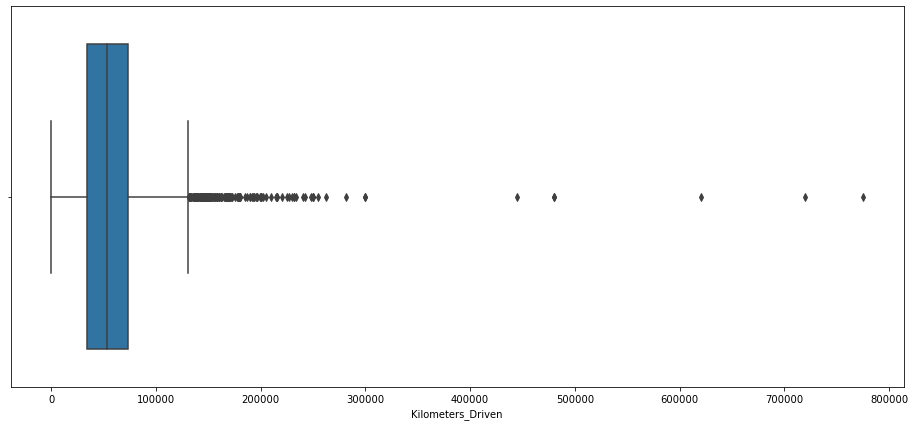

In [16]:
plt.figure(figsize=(16,7))
sns.boxplot(x=df["Kilometers_Driven"])

In [48]:
#Drop outlier lagi
drop2 = df[df['Kilometers_Driven']>400000]
df = df.drop(drop2.index)
df['Kilometers_Driven'].describe()

count      6012.000000
mean      57140.104957
std       33770.706260
min         171.000000
25%       34000.000000
50%       53000.000000
75%       73000.000000
max      300000.000000
Name: Kilometers_Driven, dtype: float64

In [49]:
#Lihat rata2 dan std data yang sudah bebas dari outlier
rataRata = df['Kilometers_Driven'].mean()
std = df['Kilometers_Driven'].std()
print(std)
print(rataRata)

33770.70625970261
57140.10495675316


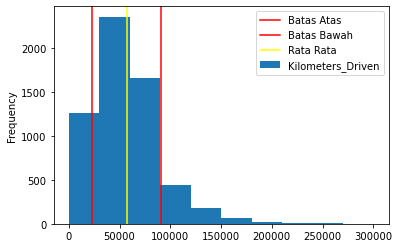

In [50]:
df['Kilometers_Driven'].plot.hist()
plt.axvline(rataRata+std,color='red',label='Batas Atas')
plt.axvline(rataRata-std,color='red',label='Batas Bawah')
plt.axvline(rataRata,color='yellow',label='Rata Rata')
plt.legend()

# No 6

In [ ]:
#6.Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang         mendukung jawaban. 
#yak ada

# No 7

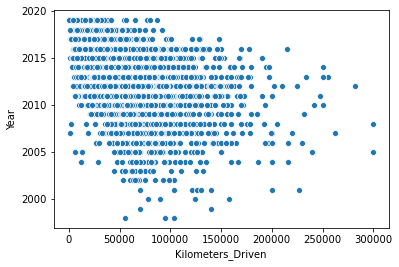

In [20]:
#7.Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan argumen yang mendukung jawaban
sns.scatterplot(x=df['Kilometers_Driven'], y=df['Year'])

In [22]:
year_km = df.loc[:,['Kilometers_Driven', 'Year']]
year_km.corr()

,Kilometers_Driven,Year
Kilometers_Driven,1.000000,-0.500872
Year,-0.500872,1.000000


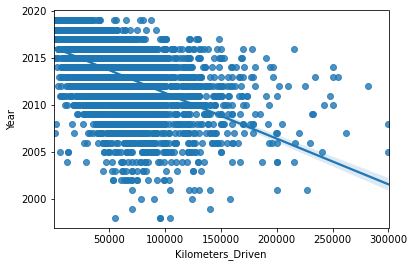

In [21]:
sns.regplot(x=df['Kilometers_Driven'], y=df['Year'])

Moderate korelasi

# No 8

In [3]:
#8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih? 
df_bekas_lagi_tapi_beda = df.loc[df.Owner_Type.isin(['Third', 'Fourth & Above'])]
df_bekas_lagi_tapi_beda.shape

(122, 13)

# No 9

In [4]:
#9.Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat? 
#df = df[df['Mileage'].notnull()]
stringMil = df['Mileage'].astype(str)
satuan = stringMil.str.split(' ')
df['konsumsiBensin'] = satuan.apply(lambda x:x[0])
df['konsumsiBensin'] = df['konsumsiBensin'].astype(float)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,konsumsiBensin
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,MARUTI,26.60
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,HYUNDAI,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,HONDA,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,MARUTI,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,AUDI,15.20


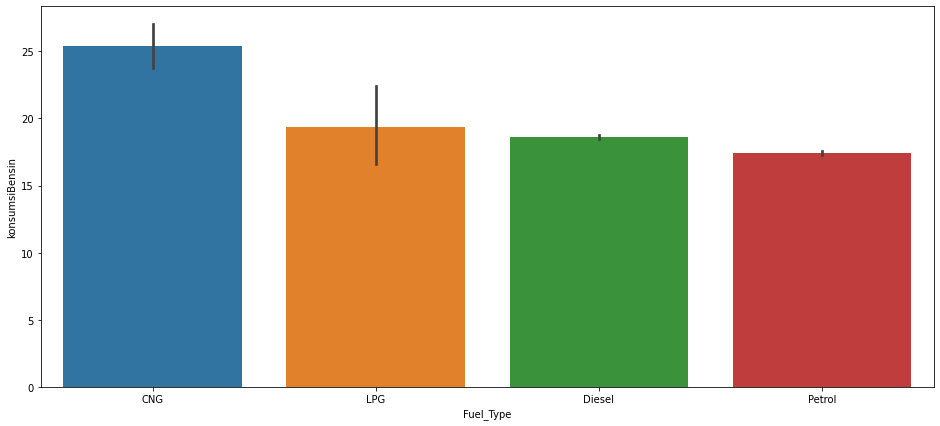

In [6]:

plt.figure(figsize=(16,7))
sns.barplot(x='Fuel_Type',y='konsumsiBensin',data=df,order=['CNG','LPG','Diesel','Petrol'])


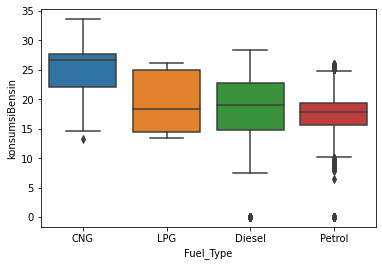

In [7]:
sns.boxplot(x='Fuel_Type',y='konsumsiBensin',data=df,order=['CNG','LPG','Diesel','Petrol'])

# No 10

In [8]:
#10.Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban
df.corr()

,Year,Kilometers_Driven,Seats,Price,konsumsiBensin
Year,1.000000,-0.173048,0.012333,0.305327,0.321565
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493,-0.065253
Seats,0.012333,0.083113,1.000000,0.052225,-0.308226
Price,0.305327,-0.011493,0.052225,1.000000,-0.306593
konsumsiBensin,0.321565,-0.065253,-0.308226,-0.306593,1.000000


In [10]:
stringPow = df['Power'].astype(str)
tenaga = stringPow.str.split(' ')
df['Tenaga'] = tenaga.apply(lambda x:x[0])
df['Tenaga']= pd.to_numeric(df['Tenaga'], errors='coerce')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,konsumsiBensin,Tenaga
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,MARUTI,26.60,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,HYUNDAI,19.67,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,HONDA,18.20,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,MARUTI,20.77,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,AUDI,15.20,140.80


In [11]:
stringEng = df['Engine'].astype(str)
mesin = stringEng.str.split(' ')
df['Mesin'] = mesin.apply(lambda x:x[0])
df['Mesin']= df['Mesin'].astype(float)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,konsumsiBensin,Tenaga,Mesin
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,MARUTI,26.60,58.16,998.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,HYUNDAI,19.67,126.20,1582.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,HONDA,18.20,88.70,1199.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,MARUTI,20.77,88.76,1248.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,AUDI,15.20,140.80,1968.0


In [ ]:
dfa=df[df['Transmission']=='Automatic']
dfm=df[df['Transmission']=='Manual']
sns.distplot(a=dfa['Year'])
sns.distplot(a=dfm['Year'])

In [39]:

def ubah(arr):
    if arr == 'First':
        return 1
    elif arr =='Second':
        return 2
    elif arr=='Third':
        return 3
    else:
        return 4
df['Kepemilikan'] = df['Owner_Type'].apply(ubah)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,konsumsiBensin,Tenaga,Mesin,Kepemilikan
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,MARUTI,26.60,58.16,998.0,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,HYUNDAI,19.67,126.20,1582.0,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,HONDA,18.20,88.70,1199.0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,MARUTI,20.77,88.76,1248.0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,AUDI,15.20,140.80,1968.0,2


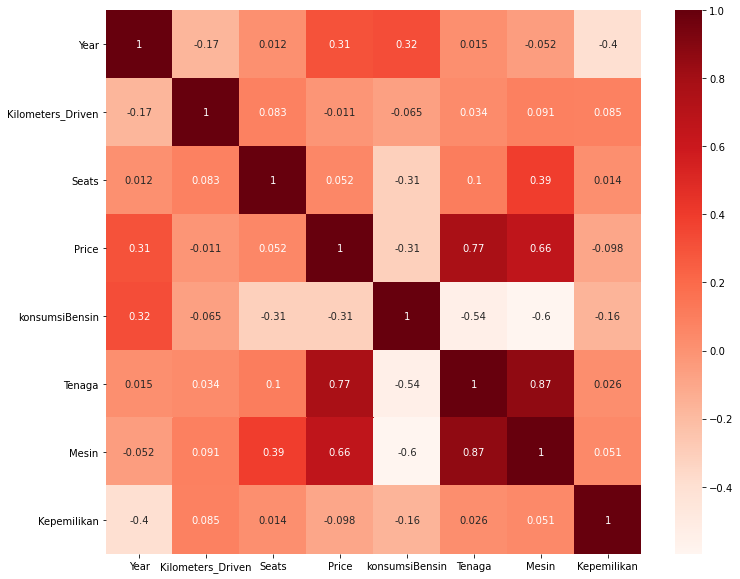

In [40]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()

sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

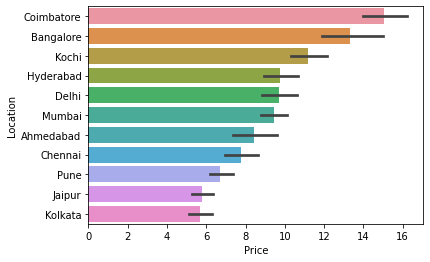

In [14]:
grupLokasi = df.groupby('Location').mean()
hargaLokasi = grupLokasi['Price'].sort_values(ascending=False)
hargaLokasi.index
sns.barplot(y='Location',x='Price',data=df,order=hargaLokasi.index)

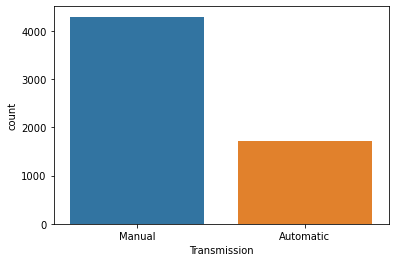

In [16]:
sns.countplot(x='Transmission',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

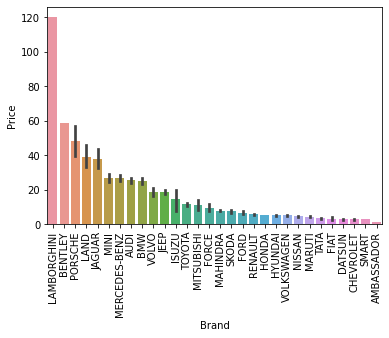

In [17]:
grupMerk = df.groupby('Brand').mean()
hargaMerk = grupMerk['Price'].sort_values(ascending=False)
#hargaLokasi.index
sns.barplot(x='Brand',y='Price',data=df,order=hargaMerk.index)
plt.xticks(rotation=90)

# Analisis Tambahan

## Filter

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

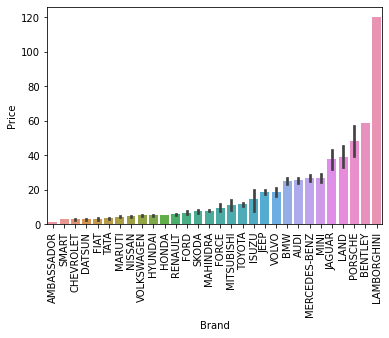

In [19]:
hargaMerk1 = grupMerk['Price'].sort_values()
sns.barplot(x='Brand',y='Price',data=df,order=hargaMerk1.index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

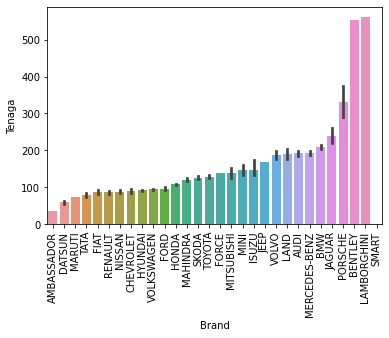

In [21]:
tenagaMerk = grupMerk['Tenaga'].sort_values()
#hargaLokasi.index
sns.barplot(x='Brand',y='Tenaga',data=df,order=tenagaMerk.index)
plt.xticks(rotation=90)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Brand              6019 non-null   object 
 13  konsumsiBensin     6017 non-null   float64
 14  Tenaga             5876 non-null   float64
 15  Mesin              5983 non-null   float64
dtypes: float64(5), int64(2),

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

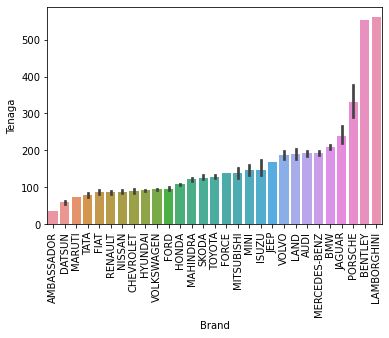

In [24]:
#Karena banyak row dmn kolom tenaga NaN maka kita hapus dulu row tersebut sblm membuat grafik lbh lanjut
df1= df.dropna()
grupMerk1 = df1.groupby('Brand').mean()
hargaMerk2 = grupMerk1['Tenaga'].sort_values()
sns.barplot(x='Brand',y='Tenaga',data=df1,order=hargaMerk2.index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

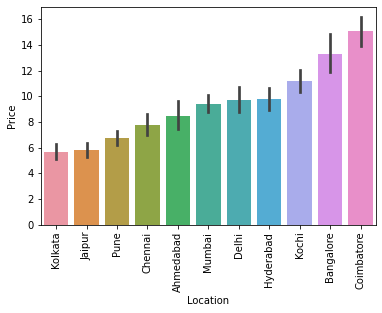

In [33]:
grupLokasi = df.groupby('Location').mean()
lokasiHarga = grupLokasi['Price'].sort_values()
sns.barplot(x='Location',y='Price',data=df,order=lokasiHarga.index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

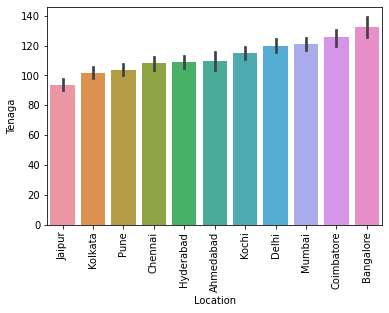

In [34]:
lokasiTenaga=grupLokasi['Tenaga'].sort_values()
sns.barplot(x='Location',y='Tenaga',data=df,order=lokasiTenaga.index)
plt.xticks(rotation=90)

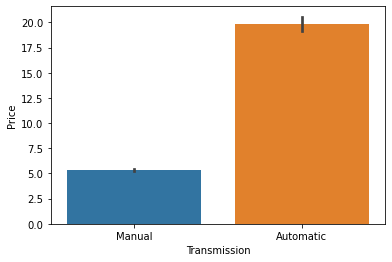

In [35]:
sns.barplot(x = 'Transmission', y = 'Price', data = df)

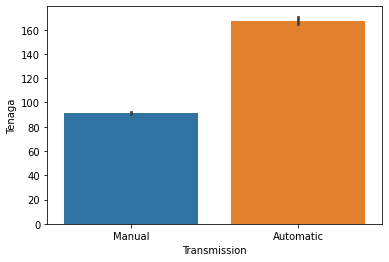

In [36]:
sns.barplot(x = 'Transmission', y = 'Tenaga', data = df)

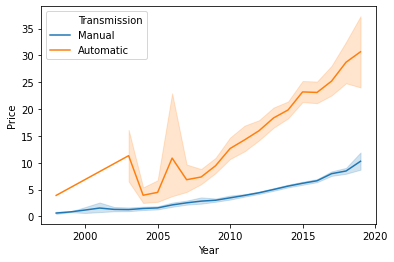

In [37]:
sns.lineplot(x='Year',y='Price',hue='Transmission',data=df)

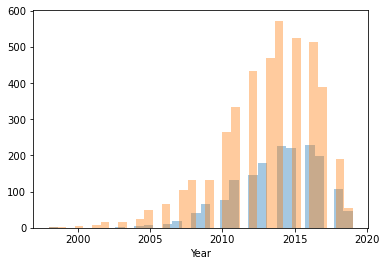

In [38]:
dfa=df[df['Transmission']=='Automatic']
dfm=df[df['Transmission']=='Manual']
sns.distplot(a=dfa['Year'],kde=False)
sns.distplot(a=dfm['Year'],kde=False)

# Untuk metode embedded dan wrapper kami menjalankannya di google collab

# Embedded

In [ ]:
reg = LassoCV()
df=df.dropna(axis=0)
X = df.loc[:,['Year','Kilometers_Driven','Mesin','Tenaga','konsumsiBensin','Seats']]
y=df['Price']
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Wrapper

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

df = df.dropna(axis=0)
X =df.loc[:,['Year', 'Kilometers_Driven', 'Seats', 'konsumsiBensin', 'Mesin', 'Tenaga']]   #Feature Matrix
y = df['Price']          #Target Variable
print(X.shape)
print(y.shape)
print(len(X))

In [41]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 6)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

NameError: name 'LinearRegression' is not defined

In [6]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Brand              6019 non-null   object 
 13  konsumsiBensin     6017 non-null   float64
 14  Mesin              5983 non-null   float64
 15  Tenaga             5876 non-null   float64
dtypes: float64(5), int64(2),